# Imports

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor, StackingClassifier)
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)

# Initialization

In [5]:
#Load the data into the notebook as a dataframe.

all_seasons_df = pd.read_csv('/Users/johnmetzger/Desktop/Coding/Projects/Project3/all_seasons_df')

# Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_seasons_df.drop('WL',axis=1), 
                                                                all_seasons_df.WL,test_size=0.2, random_state=42)

In [7]:
randomforest = RandomForestClassifier(n_estimators=1000)

In [8]:
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

# Predict and Score

In [10]:
randomforest = RandomForestClassifier(n_estimators=300)
randomforest.fit(X_train, y_train)
print("The accuracy score for Random Forest is")
print("Training: {:6.2f}%".format(100*randomforest.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*randomforest.score(X_test, y_test)))

The accuracy score for Random Forest is
Training: 100.00%
Test set:  71.92%


In [11]:
randomforest.score(X_test,y_test)

0.719209161624892

# Cross-Validation

In [14]:
#10-fold cross-validation.

scores = cross_val_score(randomforest, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

KeyboardInterrupt: 

In [15]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

NameError: name 'scores' is not defined

# Other Metrics

In [18]:
y_true, y_pred = y_test, randomforest.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4657
           1       0.72      0.72      0.72      4599

    accuracy                           0.72      9256
   macro avg       0.72      0.72      0.72      9256
weighted avg       0.72      0.72      0.72      9256



# ROAUC Curve

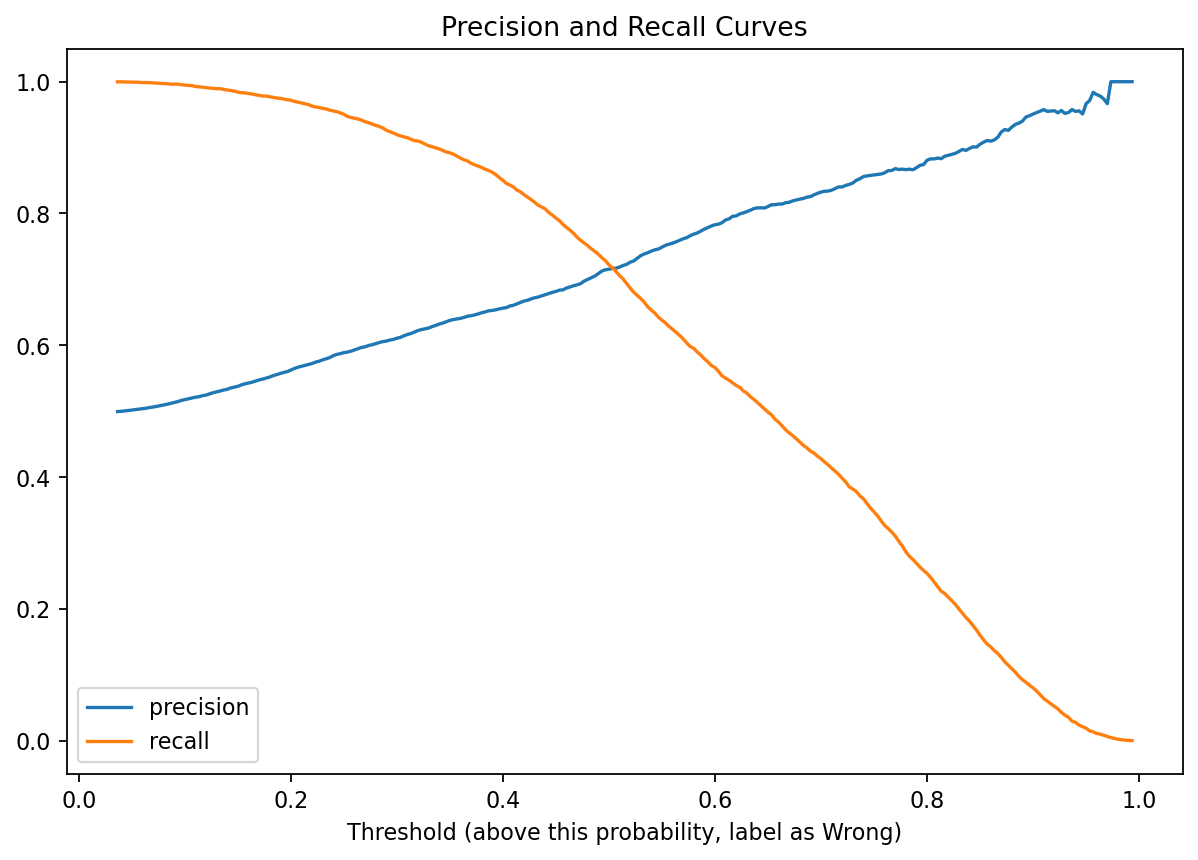

In [19]:
#Let's use probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, randomforest.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Wrong)');
plt.title('Precision and Recall Curves');

* The intersection above is the threshold value of where precision and recall are balanced.

* Chose the threshold per use case.  

* Think about if i want to weigh precision or recall more for my use case.

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1])

In [26]:
taste = fpr, tpr, thresholds

ROC AUC score =  0.7983613713300354


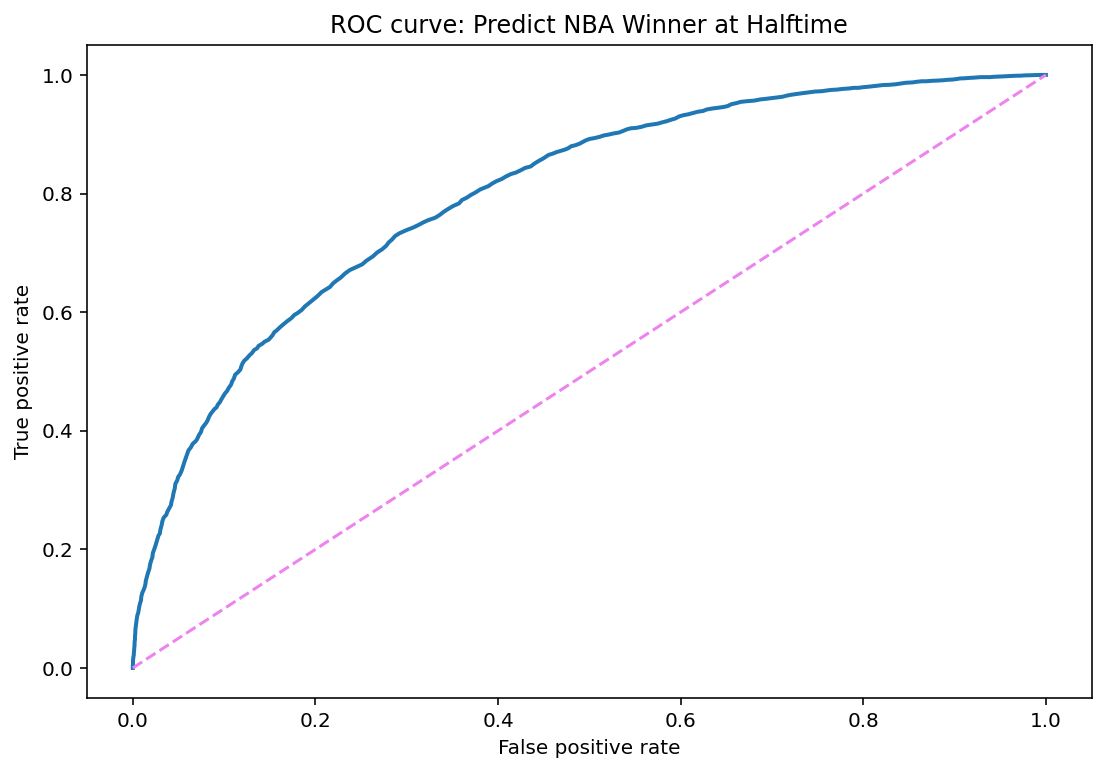

In [27]:
#ROAUC Curve Figure

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.rcParams["figure.figsize"] = (4,4)
plt.savefig('test2png', dpi=300, format='pdf')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: Predict NBA Winner at Halftime');
print("ROC AUC score = ", roc_auc_score(y_test, randomforest.predict_proba(X_test)[:,1]))

# GridSearch

*Due to computational constraints, Grid search hyperparameter ranges were entered manually and then combined for runs later.

The hyperparameters are:
1. *n_estimators*
2. *max_depth*
3. *min_samples_split*
4. *min_samples_leaf*


In [29]:
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]


hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(randomforest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
#This makes bestF your random forest model to do .predict on.
gridF.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': [14, 16, 18],
                         'min_samples_leaf': [7, 9, 11],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100]},
             verbose=1)

In [ ]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]
'''

gridF.best_score_

In [ ]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]
'''

gridF.best_params_

In [59]:
'''
max_depth = [12,14,16,18]
min_samples_leaf = [7,9,11,13] 
min_samples_split = [5]
n_estimators = [100]
'''

gridF.best_score_

0.7207606415408425

In [60]:
'''
max_depth = [12,14,16,18]
min_samples_leaf = [7,9,11,13] 
min_samples_split = [5]
n_estimators = [100]
'''

gridF.best_params_

{'max_depth': 16,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 100}

In [51]:
'''
max_depth = [5,8,10,12,14]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''

gridF.best_score_

0.7212738382303945

In [52]:
'''
max_depth = [5,8,10,12,14]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]

'''
gridF.best_params_

{'max_depth': 14,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 100}

In [48]:
'''
max_depth = [10]
min_samples_leaf = [7] 
min_samples_split = [2]
n_estimators = [10,30,100,500,1000]
'''

gridF.best_score_

0.7211928206527713

In [49]:
'''
max_depth = [10]
min_samples_leaf = [7] 
min_samples_split = [2]
n_estimators = [10,30,100,500,1000]
'''

gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''

gridF.best_score_

0.7218681115961427

In [46]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5] 
min_samples_split = [2,5]
n_estimators = [100]
 '''


gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5] 
min_samples_split = [2,5]
n_estimators = [100]
 '''


gridF.best_score_

0.7220301139188479

In [43]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [2,5,7,9] 
min_samples_split = [2,5,7,9]
n_estimators = [100]
'''
gridF.best_params_

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5]
min_samples_split = [2]
n_estimators = [100]
''' 

gridF.best_score_

0.7203014324925094

In [39]:
'''
max_depth = [5, 8, 10, 12]
min_samples_leaf = [5]
min_samples_split = [2]
n_estimators = [100]
''' 



gridF.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

## Best Hyperparameters

Note: not all combinations were tested all at once.

Range tested:
* max_depth = [5,8,10,12]
* min_samples_leaf = [2,5,7,9] 
* min_samples_split = [2,5,7,9]
* n_estimators = [10,30,100,500,1000]


In [30]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]'''

gridF.best_score_

0.7215439405991922

In [31]:
'''
max_depth = [14,16,18]
min_samples_leaf = [7,9,11] 
min_samples_split = [2,5,7]
n_estimators = [100]'''

gridF.best_params_

{'max_depth': 14,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 100}